In [7]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost

  Using cached xgboost-3.1.3-py3-none-win_amd64.whl.metadata (2.0 kB)
Using cached xgboost-3.1.3-py3-none-win_amd64.whl (72.0 MB)



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')


In [9]:
path="Crop_recommendation.csv"
df=pd.read_csv(path)
df


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [10]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   str    
dtypes: float64(4), int64(3), str(1)
memory usage: 137.6 KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


In [12]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='str')

In [13]:
unique_labels = df['label'].unique()
label_map = {label: i for i, label in enumerate(unique_labels)}
df['label_encoded'] = df['label'].map(label_map)
print(df[['label', 'label_encoded']].head())
print(f"Mapping created: {label_map}")

  label  label_encoded
0  rice              0
1  rice              0
2  rice              0
3  rice              0
4  rice              0
Mapping created: {'rice': 0, 'maize': 1, 'chickpea': 2, 'kidneybeans': 3, 'pigeonpeas': 4, 'mothbeans': 5, 'mungbean': 6, 'blackgram': 7, 'lentil': 8, 'pomegranate': 9, 'banana': 10, 'mango': 11, 'grapes': 12, 'watermelon': 13, 'muskmelon': 14, 'apple': 15, 'orange': 16, 'papaya': 17, 'coconut': 18, 'cotton': 19, 'jute': 20, 'coffee': 21}


In [14]:
df.tail(10)

,N,P,K,temperature,humidity,ph,rainfall,label,label_encoded
2190,103,40,30,27.309018,55.196224,6.348316,141.483164,coffee,21
2191,118,31,34,27.548230,62.881792,6.123796,181.417081,coffee,21
2192,106,21,35,25.627355,57.041511,7.428524,188.550654,coffee,21
2193,116,38,34,23.292503,50.045570,6.020947,183.468585,coffee,21
2194,97,35,26,24.914610,53.741447,6.334610,166.254931,coffee,21
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,21
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,21
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,21
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,21
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee,21


In [ ]:
!pip install ydata-profiling

  Using cached ydata_profiling-4.18.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached scipy-1.16.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.0-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached visions-0.8.1-py3-none-any.whl.metadata (11 kB)
  Using cached numpy-2.3.5-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached phik-0.12.5-cp313-cp313-win_amd64.whl.metadata (5.6 kB)
  Using cached multimethod-1.12-py3-none-any.whl.metadata (9.6 kB)
  Using cached ImageHash-4.3.2-py2.py3-none-any.whl.metadata (8.4 kB)
  Using cached wordcloud-1.9.6-cp313-cp313-win_amd64.whl.metadata (3.5 kB)
  Using cached dacite-1.9.2-py3-none-any.whl.metadata (17 kB)
Using cached ydata_profiling-4.18.1-py2.py3-none-any.whl (400 kB)
Using cached ImageHash-4.3.2-py2.py3-none-any.whl (296 kB)
Using cached dacite-1.9.2-py3-none-any.whl (16 kB)
Using cached matplotlib-3.10.0-cp313-cp313-win_amd64

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\anaconda\\Lib\\site-packages\\numpy\\fft\\_pocketfft_umath.cp313-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [ ]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df, title="Mahbub's Profiling Report")
# profile.to_file("report.html")

In [15]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,label_encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,0
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,21
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,21
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,21
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,21


In [16]:
#maped target
details={'rice': 0,
         'maize': 1,
         'chickpea': 2,
         'kidneybeans': 3,
         'pigeonpeas': 4,
         'mothbeans': 5,
         'mungbean': 6,
         'blackgram': 7,
         'lentil': 8,
         'pomegranate': 9,
         'banana': 10,
         'mango': 11,
         'grapes': 12,
         'watermelon': 13,
         'muskmelon': 14,
         'apple': 15,
         'orange': 16,
         'papaya': 17,
         'coconut': 18,
         'cotton': 19,
         'jute': 20,
         'coffee': 21}

In [17]:
df_2=df.drop(['label'],axis=1)
df_2

,N,P,K,temperature,humidity,ph,rainfall,label_encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,21
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,21
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,21
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,21


In [18]:
df_2.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall',
       'label_encoded'],
      dtype='str')

In [19]:
df_2.isnull().sum()

N                0
P                0
K                0
temperature      0
humidity         0
ph               0
rainfall         0
label_encoded    0
dtype: int64

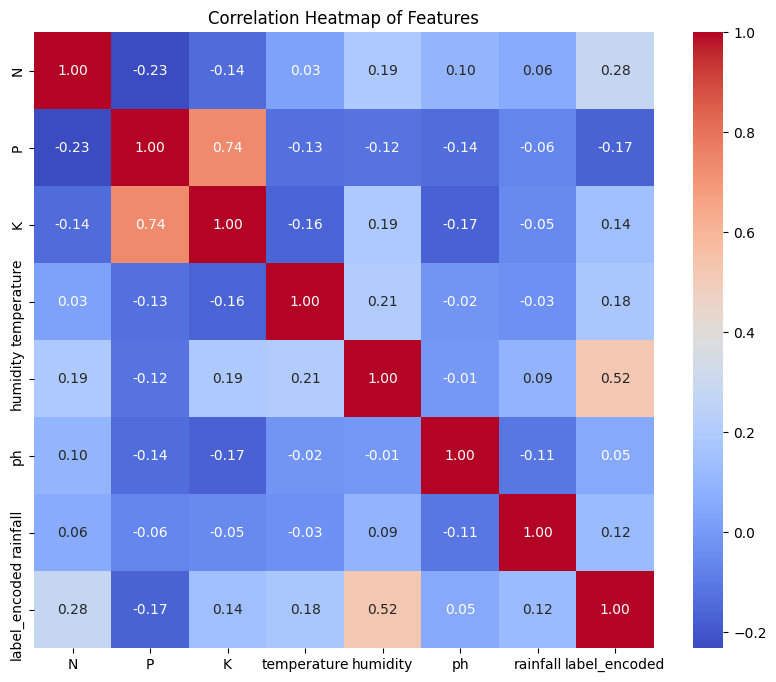

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_2.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

In [21]:
df_2['label_encoded'].value_counts()

label_encoded
0     100
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
Name: count, dtype: int64

In [23]:

X = df_2.drop('label_encoded', axis=1)
y = df_2['label_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Original X_train shape:", X_train.shape)
print("Scaled X_train shape:", X_train.shape)
print("Original X_test shape:", X_test.shape)
print("Scaled X_test shape:", X_test.shape)

Original X_train shape: (1760, 7)
Scaled X_train shape: (1760, 7)
Original X_test shape: (440, 7)
Scaled X_test shape: (440, 7)


In [24]:
preprocessor=Pipeline(
    steps=[
    ('scaler',StandardScaler())
])

In [25]:
lr=LogisticRegression()
rf=RandomForestClassifier(n_estimators=100,random_state=42)
ada=AdaBoostClassifier(n_estimators=100,random_state=42)
gb=GradientBoostingClassifier(n_estimators=100,random_state=42)
xgb=XGBClassifier(n_estimators=100,random_state=42)

In [26]:
models={
    'Logistic Regression':lr,
    'Random Forest Classifier':rf,
    'AdaBoost Classifier':ada,
    'Gradient Boosting Classifier':gb,
    'XGB Classifier':xgb
}

In [27]:
results=[]

for name,model in models.items():
   pipe=Pipeline(
      steps=[
          ('preprocessor',preprocessor),
          ('model',model)
      ]
   )
   pipe.fit(X_train,y_train)
   y_pred=pipe.predict(X_test)
   accuracy=accuracy_score(y_test,y_pred)
   results.append((name,accuracy))
   results_df=pd.DataFrame(results,columns=['Model','Accuracy'],)

results_df.sort_values(by='Accuracy',ascending=False)

,Model,Accuracy
1,Random Forest Classifier,0.993182
4,XGB Classifier,0.986364
3,Gradient Boosting Classifier,0.981818
0,Logistic Regression,0.963636
2,AdaBoost Classifier,0.315909


In [28]:
final_model=RandomForestClassifier(n_estimators=100,
                                   random_state=42,
                                   n_jobs=-1,
                                   max_depth=15
                                   )
final_model.fit(X_train,y_train)
y_train_pred_final=final_model.predict(X_train)
y_test_pred_final=final_model.predict(X_test)
training_accuracy_final=accuracy_score(y_train,y_train_pred_final)
testing_accuracy_final=accuracy_score(y_test,y_test_pred_final)
print("training accuracy: ",training_accuracy_final)
print("training accuracy: ",testing_accuracy_final)
print("classification report: ")
print(classification_report(y_test,y_test_pred_final))

training accuracy:  1.0
training accuracy:  0.9931818181818182
classification report: 
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        23
           5       1.00      0.96      0.98        24
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        20
           8       0.92      1.00      0.96        11
           9       1.00      1.00      1.00        23
          10       1.00      1.00      1.00        21
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        14
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00     

In [29]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

In [30]:
load_model=pickle.load(open('model.pkl','rb'))

load_model.predict(X_test)

array([14, 13, 17, 17, 15, 11, 15,  5,  6,  8,  7, 18,  9, 20, 18,  9, 15,
        1, 17, 14, 21, 17, 16, 17,  2, 20,  6, 16,  4,  0,  9,  5, 20,  8,
       20,  7, 20,  2,  2,  3, 17, 11,  7,  1,  6,  1,  4, 18, 14,  1,  7,
       21, 12,  6, 21,  3, 19, 15, 10,  7, 13, 18,  8, 16, 17,  4, 16,  0,
       14,  4, 14, 18, 20, 10,  7, 17, 10, 19, 13, 16, 21,  2,  0,  5, 16,
       11, 21,  5,  7,  9,  1,  5, 19, 17,  4,  5,  3, 21,  7,  8, 18,  0,
       16, 14, 13,  3, 13, 10,  4,  5, 10, 20, 19,  9,  4,  2,  1, 18,  9,
        0,  4, 12,  7, 18,  2,  7, 18,  1, 10,  5, 10,  3,  9,  2, 18, 16,
        4, 10, 10, 15,  3, 14,  6,  5, 18,  1, 15, 18,  3,  5,  6,  8, 13,
        6,  4,  4,  4,  3,  1, 20,  2, 15, 16, 19,  0, 18, 12,  8, 13, 12,
       12,  7,  9,  2, 18,  1,  8, 12, 13, 20, 21, 21,  3, 20,  5,  3, 10,
        3, 18, 17, 17,  6, 11,  9, 13,  3,  1, 15,  7,  2, 12, 12, 10, 19,
        0,  9,  6, 10, 20,  6,  1,  2,  2,  2, 15,  0,  3, 17, 21,  7,  3,
       11, 11, 18, 17, 15

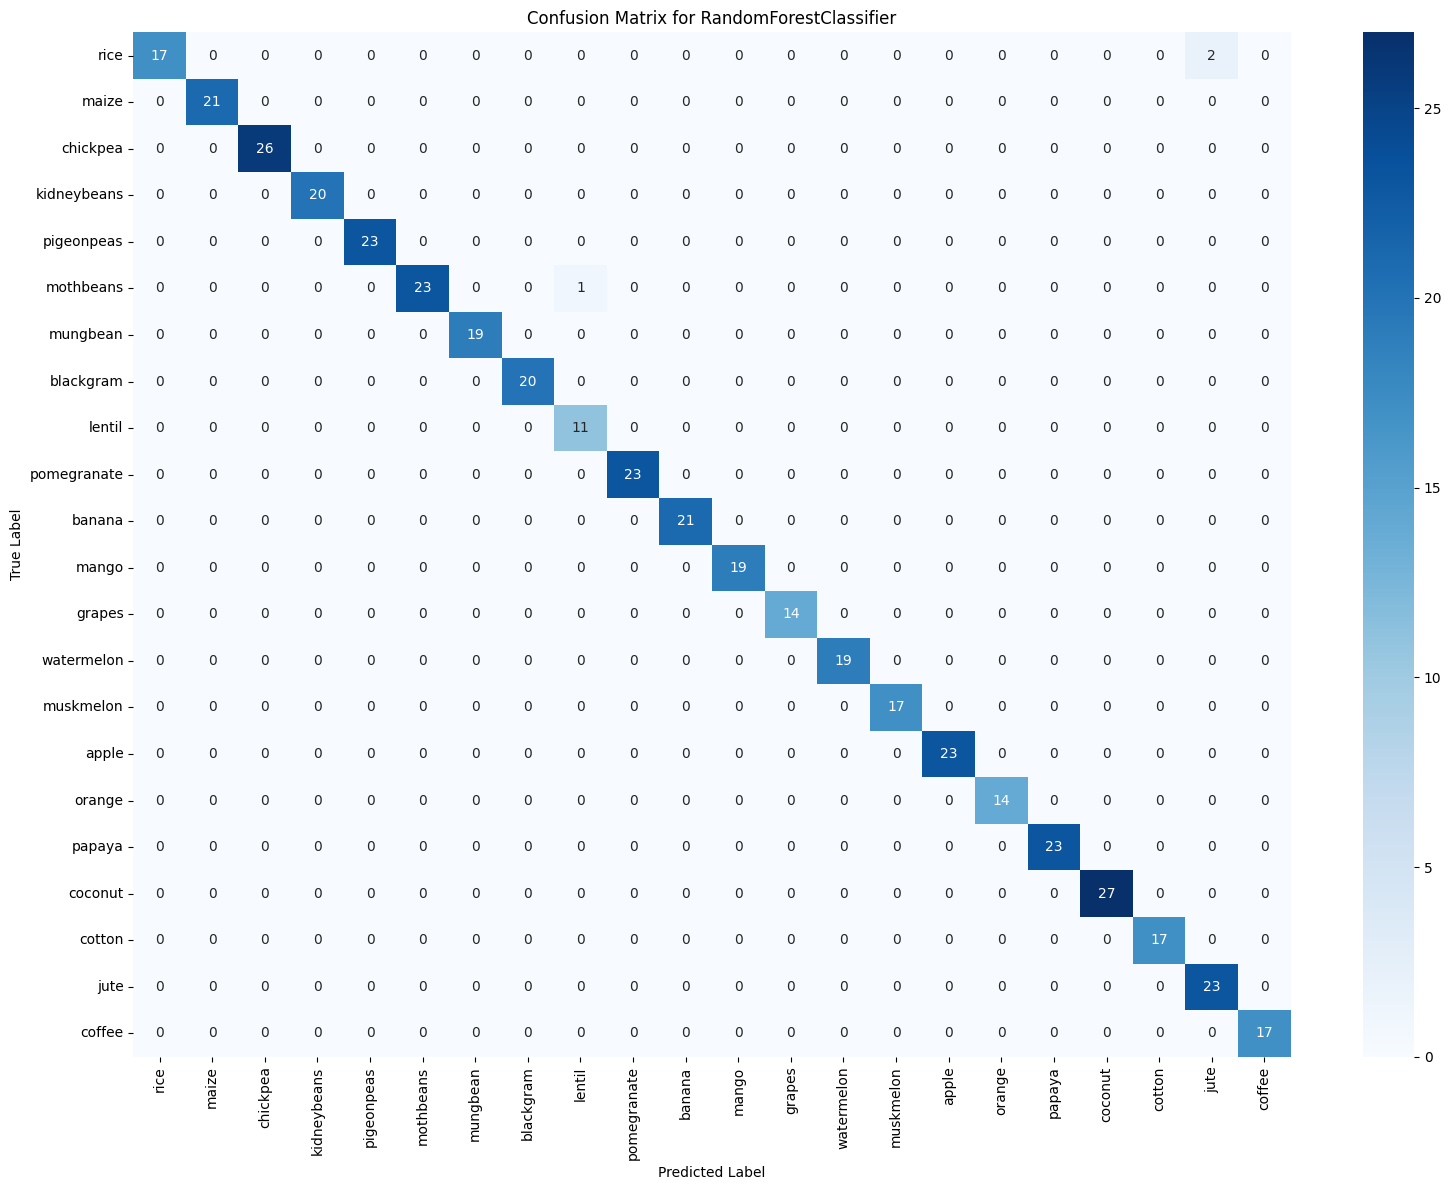

In [31]:
cm = confusion_matrix(y_test, y_test_pred_final)

plt.figure(figsize=(16, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Get original labels from the details dictionary, sorted by their encoded value
original_labels = [label for label, encoded_value in sorted(details.items(), key=lambda item: item[1])]

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.xticks(ticks=np.arange(len(original_labels)) + 0.5, labels=original_labels, rotation=90)
plt.yticks(ticks=np.arange(len(original_labels)) + 0.5, labels=original_labels, rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
print("Enter the values for the following parameters to predict the crop:")
N_val = float(input("Enter N (Nitrogen) value: "))
P_val = float(input("Enter P (Phosphorus) value: "))
K_val = float(input("Enter K (Potassium) value: "))
temp_val = float(input("Enter Temperature value: "))
hum_val = float(input("Enter Humidity value: "))
ph_val = float(input("Enter pH value: "))
rain_val = float(input("Enter Rainfall value: "))

# Create a DataFrame from the input values
input_data = pd.DataFrame([[N_val, P_val, K_val, temp_val, hum_val, ph_val, rain_val]],
                          columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])

# Scale the input data using the pre-fitted scaler
# Ensure X is defined from df_2.drop('label_encoded', axis=1) if not already done
# We already have X_train and X_test scaled, so we should use the same scaler for new data.
# The scaler object is available from the earlier execution.
scaled_input_data = scaler.transform(input_data)

# Make prediction using the final model
predicted_label_encoded = final_model.predict(scaled_input_data)

# Map the predicted encoded label back to the original crop name
# Reverse the details dictionary to get label from encoded value
reverse_details = {v: k for k, v in details.items()}
predicted_crop_name = reverse_details[predicted_label_encoded[0]]

print(f"\nThe predicted crop for the given conditions is: {predicted_crop_name}")